In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = np.fromfile("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/routine3/data/grid_data/CTS_bin-proc2137307673.d", dtype=np.float64)

In [3]:
Nx, Ny, Nz, ntot = file[:4]

In [ ]:
print(Nx, Ny, Nz, ntot)

In [5]:
fdata = file[4:]

In [18]:

df_3d = pd.read_hdf("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/routine3/data/3D_data/all_data.h5", key="df")
df_3d

,x,y,z,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
0,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
1,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
5,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
7,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64600896,1681.249445,-431.671488,-4.339469,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,1.456307e-07,...,2.624713e-10,0.0,0.0,0.0,-0.0,-0.0,0.0,-8.924000e-08,-3.475668e-07,0.0
64600897,1705.036761,-325.253157,-4.339469,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,1.112814e-07,...,1.511192e-10,0.0,0.0,0.0,-0.0,-0.0,0.0,-6.724000e-08,-3.524844e-07,0.0
64600898,1722.095075,-217.551200,-4.339469,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,7.517719e-08,...,0.000000e+00,0.0,0.0,0.0,-0.0,-0.0,0.0,-4.497464e-08,-3.560109e-07,0.0
64600899,1732.357066,-108.990668,-4.339469,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,3.788735e-08,...,0.000000e+00,0.0,0.0,0.0,-0.0,-0.0,0.0,-2.253178e-08,-3.581324e-07,0.0


In [ ]:
len(df_3d.columns)

In [ ]:
fdata = fdata.reshape((-1, len(df_3d.columns)))
df = pd.DataFrame(fdata, columns=list(df_3d.columns))
df

In [19]:

import os
import pathlib 
dataframes = []
for f in pathlib.Path("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/routine3/data/grid_data").glob("*.d"):
    dataframes.append(str(f))
#np.fromfile("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/routine3/data/grid_data/CTS_bin-proc2137307673.d", dtype=np.float64)

dataframes = [np.fromfile(f, dtype=np.float64) for f in dataframes]
#dataframes = [d[4:].reshape((-1, len(df_3d.columns))) for d in dataframes]
#dataframes = [pd.DataFrame(d.reshape((-1, len(df_3d.columns))), columns=list(df_3d.columns)) for d in dataframes]
#df_interpolated = pd.concat(dataframes, ignore_index=True)
#df_interpolated

In [20]:
dfs = []
failed = []
for d in dataframes:
    try:
        d = d[4:]
        d = d.reshape((-1, len(df_3d.columns)))
        d = pd.DataFrame(d, columns=list(df_3d.columns))
        dfs.append(d)
    except:
        failed.append(d)

In [21]:
print(len(dfs), len(failed))

1280 0


In [22]:
df_interpolated = pd.concat(dfs, ignore_index=True)


In [23]:
df_interpolated_xyplane = df_interpolated[df_interpolated["z"] == np.float64(0)]

In [ ]:
df_interpolated.describe()

In [14]:

df_interpolated_xplane = df_interpolated[
    (df_interpolated.y >= np.float64(-0.0001)) & 
    (df_interpolated.y <= np.float64(0.0001)) & 
    (df_interpolated.z >= np.float64(-0.0001)) & 
    (df_interpolated.z <= np.float64(0.0001))
]

df_interpolated_xplane = df_interpolated_xplane.sort_values(['x', 'y', 'z'])

In [9]:
df_3d["x_abs"] = np.abs(df_3d.x)
df_3d["y_abs"] = np.abs(df_3d.y)
df_3d["z_abs"] = np.abs(df_3d.z)

In [25]:
df_3d_xyplane = df_3d[df_3d["z"] == np.float64(0)]

In [ ]:
df_3d.describe()

In [24]:

df_3d = pd.read_hdf("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/routine3/data/3D_data/all_data.h5", key="df")
df_3d

,x,y,z,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
0,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
1,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
5,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
7,0.000000,0.000000,0.300000,0.000000,-0.234914,0.0,0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64600896,1681.249445,-431.671488,-4.339469,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,1.456307e-07,...,2.624713e-10,0.0,0.0,0.0,-0.0,-0.0,0.0,-8.924000e-08,-3.475668e-07,0.0
64600897,1705.036761,-325.253157,-4.339469,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,1.112814e-07,...,1.511192e-10,0.0,0.0,0.0,-0.0,-0.0,0.0,-6.724000e-08,-3.524844e-07,0.0
64600898,1722.095075,-217.551200,-4.339469,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,7.517719e-08,...,0.000000e+00,0.0,0.0,0.0,-0.0,-0.0,0.0,-4.497464e-08,-3.560109e-07,0.0
64600899,1732.357066,-108.990668,-4.339469,-0.999101,0.000000,0.0,0.0,1.000450,1.001799,3.788735e-08,...,0.000000e+00,0.0,0.0,0.0,-0.0,-0.0,0.0,-2.253178e-08,-3.581324e-07,0.0


In [16]:
df_3d_xplane = df_3d[
    (df_3d.y >= np.float64(-0.0001)) & 
    (df_3d.y <= np.float64(0.0001)) & 
    (df_3d.z >= np.float64(-0.0001)) & 
    (df_3d.z <= np.float64(0.0001))
]

df_3d_xplane = df_3d_xplane.sort_values(['x', 'y', 'z'])

In [ ]:
df_3d_xplane

In [ ]:
list(df_3d_xplane.columns)

In [ ]:
df_interpolated_xplane

In [ ]:

for col in list(df_3d.columns)[3:]:
    fig, ax = plt.subplots(figsize=(20,12))
    #plt.subplots_adjust(right=0.75)
    plt.xlim(1e-6, 100)
    plt.xscale('log')
    ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane[col], color='#644117', label="interpolated data")
    #ax.plot(df_2d_new_xplane["r"], df_2d_new_xplane[col], color='b', label="2d data")
    ax.plot(df_3d_xplane["x"], df_3d_xplane[col], linestyle="--", color='b', label="3d data")
    ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
    #ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane[col], color='#644117', linestyle=":", label="interpolated data")
    plt.xlabel("x")
    plt.ylabel(col)
    plt.title("{} vs x (y = 0, z = 0)".format(col))
    #plt.title("{} vs r (phi = {}, theta = {})".format(col, df_3d_xplane.phi.unique()[0], df_3d_xplane.theta.unique()[0]))
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    #plt.savefig("r_vs_{}_3dv4.png".format(col))

    plt.show()

In [ ]:

for col in list(df_3d.columns)[3:]:
    #fig, ax = plt.subplots(figsize=(20,12))
    #plt.subplots_adjust(right=0.75)
    plt.ylim(1e-6, 100)
    plt.xlim(1e-6, 100)
    plt.yscale('log')
    plt.xscale('log')
    plt.pcolormesh(df_interpolated_xyplane["x"], df_interpolated_xyplane["y"], df_interpolated_xyplane[["x", "y", col]])
    plt.title("{} vs x,y, z=0, interpolated data".format(col))
    plt.show()
for col in list(df_3d.columns)[3:]:
    #fig, ax = plt.subplots(figsize=(20,12))
    #plt.subplots_adjust(right=0.75)

    plt.ylim(1e-6, 100)
    plt.xlim(1e-6, 100)
    plt.yscale('log')
    plt.xscale('log')
    plt.pcolormesh(df_3d_xyplane["x"], df_3d_xyplane["y"], df_3d_xyplane[["x", "y", col]])
    plt.title("{} vs x,y, z=0, 3d data".format(col))
    plt.show()

In [33]:
print(len(df_interpolated_xyplane[["x", "y", "rho"]]))
print(len(df_interpolated_xyplane["x"].unique()))
print(len(df_interpolated_xyplane["y"].unique()))
print(518*930)
print(518*930 - len(df_interpolated_xyplane[["x", "y", "rho"]]))
df_interpolated_xyplane["x"].unique()

151108
518
930
481740
330632


69770
69360
80201


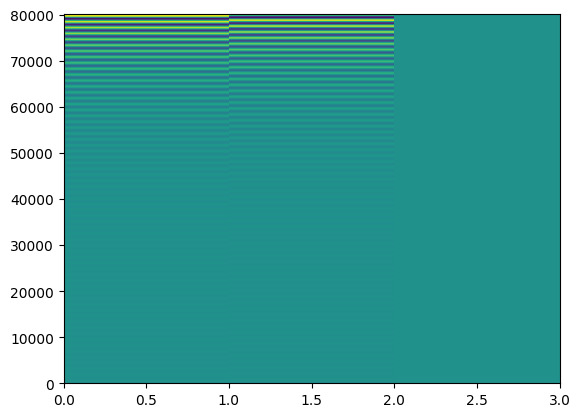

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.pcolormesh
print(len(df_3d_xyplane.x.unique()))
print(len(df_3d_xyplane.y.unique()))
print(len(df_3d_xyplane))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for col in list(df_3d.columns)[3:]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Interpolated data
    x = df_interpolated_xyplane["x"].values
    y = df_interpolated_xyplane["y"].values
    z = df_interpolated_xyplane[col].values

    # Reshape the data
    x_unique = np.sort(np.unique(x))
    y_unique = np.sort(np.unique(y))
    X, Y = np.meshgrid(x_unique, y_unique)
    Z = z.reshape(len(y_unique), len(x_unique))

    ax1.set_ylim(1e-6, 100)
    ax1.set_xlim(1e-6, 100)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    im1 = ax1.pcolormesh(X, Y, Z, shading='auto')
    ax1.set_title(f"{col} vs x,y, z=0, interpolated data")
    plt.colorbar(im1, ax=ax1)

    # 3D data
    x = df_3d_xyplane["x"].values
    y = df_3d_xyplane["y"].values
    z = df_3d_xyplane[col].values

    # Reshape the data
    x_unique = np.sort(np.unique(x))
    y_unique = np.sort(np.unique(y))
    X, Y = np.meshgrid(x_unique, y_unique)
    Z = z.reshape(len(y_unique), len(x_unique))

    ax2.set_ylim(1e-6, 100)
    ax2.set_xlim(1e-6, 100)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    im2 = ax2.pcolormesh(X, Y, Z, shading='auto')
    ax2.set_title(f"{col} vs x,y, z=0, 3d data")
    plt.colorbar(im2, ax=ax2)

    plt.tight_layout()
    plt.show()
